In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, filters, feature, measure
import pyclesperanto_prototype as cle
from scipy import ndimage as ndi
from scipy import stats
import pandas as pd

In [2]:
import os
import re

In [3]:
img_path = "./data_04_04/images/"
msk_path = "./data_04_04/masks/"

img_list = os.listdir(img_path)
msk_list = os.listdir(msk_path)

In [4]:
def sort_by_number(list_name):
    list_name.sort(key=lambda f: int(re.sub('\D', '', f)))
    return list_name

In [5]:
img_list = sort_by_number(img_list)
msk_list = sort_by_number(msk_list)

In [6]:
assert len(img_list) == len(msk_list)
print("Number of images: ", len(img_list))
print("Number of masks: ", len(msk_list))

Number of images:  99
Number of masks:  99


In [7]:
# Check that image position in file name is corresponding to it's position in the list
def pos_check(file_list, file_path):
    file_path = sort_by_number(os.listdir(file_path))
    for actual_name, expected_name in zip(file_list, file_path):
        if actual_name.split(" ")[1][1:3] == expected_name.split(" ")[1][1:3]:
            continue
        else:
            print("Missing name: ", actual_name)
            break
    else:
        print("All good!")

In [8]:
pos_check(img_list, img_path)

All good!


In [9]:
pos_check(msk_list, msk_path)

All good!


In [10]:
import dask.array as da

In [11]:
# images = da.array([io.imread(img_path + file_name, as_gray=True) for file_name in img_list])
# masks = da.array([io.imread(msk_path + file_name, as_gray=True) for file_name in msk_list])

In [12]:
images = np.array([io.imread(img_path + file_name, as_gray=True) for file_name in img_list])
masks = np.array([io.imread(msk_path + file_name, as_gray=True) for file_name in msk_list])

In [13]:
# Plot images and masks
def plot_images(images, masks, n=5, size=(6, 10)):
    # Select n random images and masks
    idx = np.random.randint(0, images.shape[0], n)
    images = images[idx]
    masks = masks[idx]
    fig, ax = plt.subplots(n, 2, figsize=size)
    # Add space between subplots
    fig.subplots_adjust(hspace=0.5)
    for i in range(n):
        ax[i, 0].set_title(f"Image {i}")
        ax[i, 0].imshow(images[i], cmap="gray")
        ax[i, 1].set_title(f"Mask {i}")
        ax[i, 1].imshow(masks[i], cmap="gray")
    plt.show()

In [14]:
images[0]

array([[0.2776051 , 0.28180157, 0.27897333, ..., 0.36669922, 0.36361098,
        0.37117137],
       [0.27955451, 0.28346824, 0.27758941, ..., 0.35352784, 0.35631059,
        0.3605    ],
       [0.28233725, 0.27702392, 0.26582471, ..., 0.34568471, 0.34511137,
        0.34903294],
       ...,
       [0.44210353, 0.43450549, 0.45210353, ..., 0.43779333, 0.44563647,
        0.44563647],
       [0.44487922, 0.50283176, 0.54871412, ..., 0.3773102 , 0.40700118,
        0.42071529],
       [0.52328078, 0.56554706, 0.59464196, ..., 0.32297373, 0.3890749 ,
        0.40307961]])

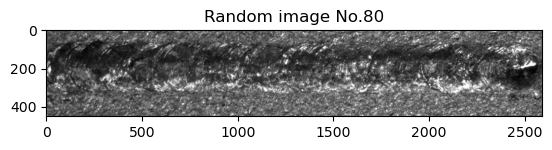

In [15]:
idx = np.random.randint(0, images.shape[0])
plt.imshow(images[idx][700:1150], cmap="gray")
plt.title(f"Random image No.{idx}")
plt.show()

In [16]:
images_cropped = images[:, 700:1150, :]
masks_cropped = masks[:, 700:1150, :] > 0

del images, masks

### Basic statistics

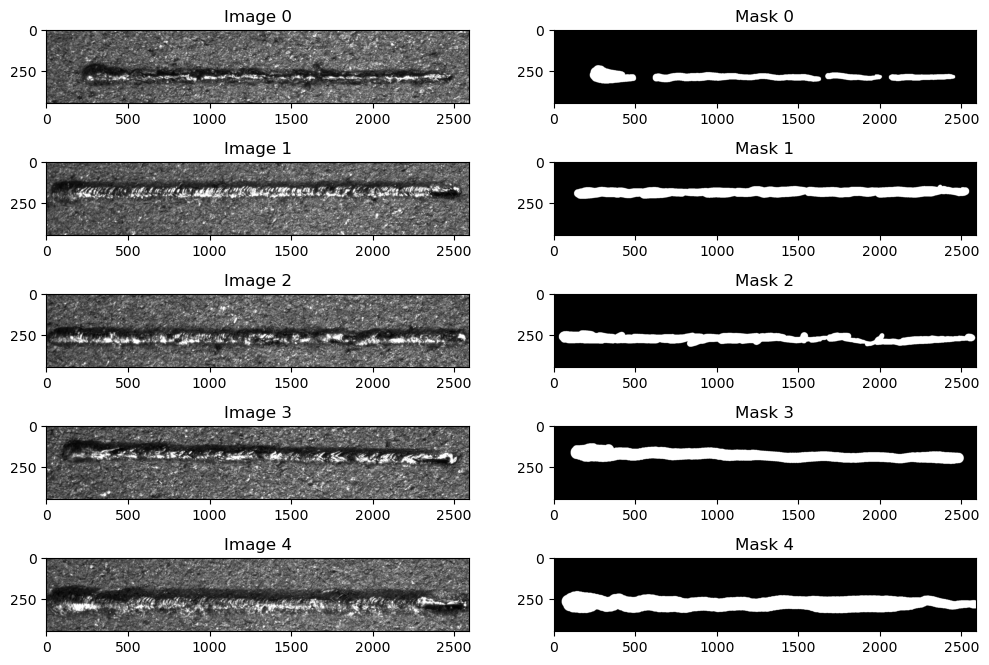

In [17]:
plot_images(images_cropped, masks_cropped, size=(12,8))

In [18]:
labels = measure.label(masks_cropped)

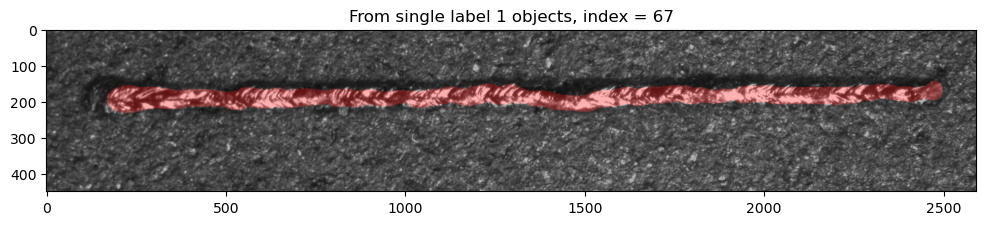

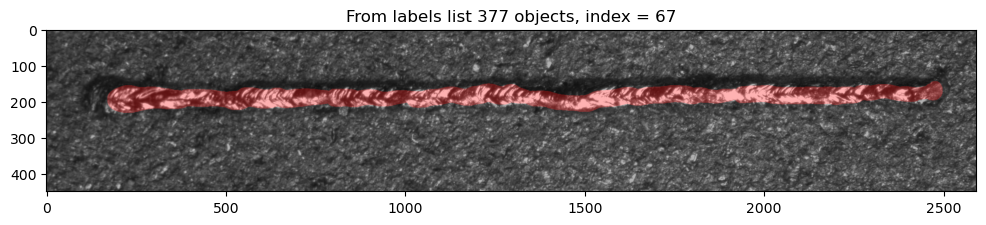

In [19]:
idx = np.random.randint(0, images_cropped.shape[0], 1)[0]
lbl = measure.label(masks_cropped[idx])
plt.figure(figsize=(12, 8))
plt.imshow(color.label2rgb(lbl, images_cropped[idx], bg_label=0))
plt.title(f"From single label {np.unique(lbl).shape[0] - 1} objects, index = {idx}")
plt.show()

rnd_inx = idx
plt.figure(figsize=(12, 8))
plt.imshow(color.label2rgb(labels[rnd_inx], images_cropped[rnd_inx], bg_label=0))
plt.title(f"From labels list {np.unique(labels).shape[0] - 1} objects, index = {rnd_inx}")
plt.show()

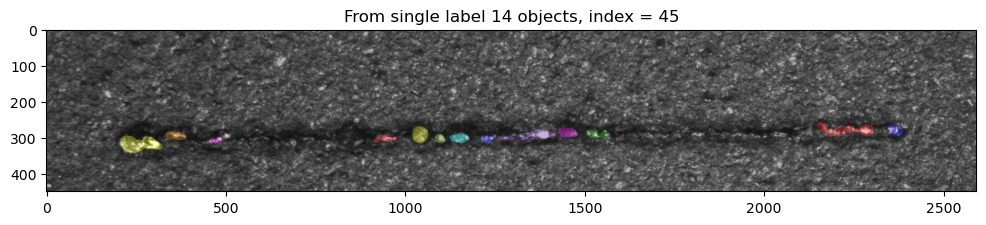

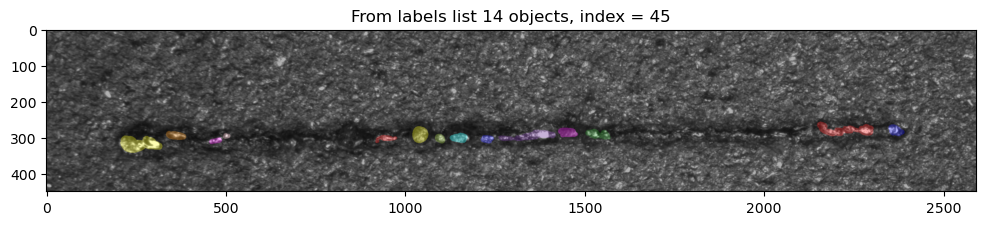

In [20]:
# Calculate labels for all cropped masks
labels = np.array([measure.label(mask) for mask in masks_cropped])

# Choose a random index
idx = np.random.randint(0, images_cropped.shape[0], 1)[0]

# Get the labeled mask for the chosen index
lbl = labels[idx]

plt.figure(figsize=(12, 8))
plt.imshow(color.label2rgb(lbl, images_cropped[idx], bg_label=0))
plt.title(f"From single label {np.unique(lbl).shape[0] - 1} objects, index = {idx}")
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(color.label2rgb(labels[idx], images_cropped[idx], bg_label=0))
plt.title(f"From labels list {np.unique(labels[idx]).shape[0] - 1} objects, index = {idx}")
plt.show()


In [21]:
continious_tracks = []
tracks_id = []
# Fill list with continious tracks
for i in range(labels.shape[0]):
    if np.unique(labels[i]).shape[0] == 2:
        continious_tracks.append(labels[i])
        tracks_id.append(i)
continious_tracks = np.array(continious_tracks)
tracks_id = np.array(tracks_id)

In [22]:
continious_tracks.shape

(27, 450, 2592)

In [23]:
tracks_id

array([24, 52, 53, 61, 62, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 84, 85,
       86, 87, 88, 89, 93, 94, 95, 96, 97, 98])

In [24]:
np.random.randint(0, labels.shape[0], 5)

array([64, 69, 43, 36, 97])

In [25]:
def plot_random_labels(images, labels, label_indices, size=(8,5), num_labels=5):
    """
    Plot a random selection of labels next to their corresponding images.
    
    Args:
    - images (np.ndarray): Array of images
    - labels (np.ndarray): Array of labels
    - label_indices (np.ndarray): Array of indices corresponding to the labels in the original array
    - num_labels (int, optional): Number of labels to plot. Defaults to 5.
    """
    # Select random indices from the labels array
    random_indices = np.random.choice(labels.shape[0], size=num_labels, replace=False)
    # Space between subplots
    plt.subplots_adjust(hspace=0.25)
    # Plot the selected labels next to their corresponding images
    fig, axs = plt.subplots(nrows=num_labels, ncols=2, figsize=size)
    # Put main title at the top
    fig.suptitle(f"Random selection of {num_labels} from {len(label_indices)} labels", fontsize=16)
    for i, idx in enumerate(random_indices):
        # Find the corresponding image index in the label_indices array
        image_idx = label_indices[idx]

        # Plot the image
        axs[i, 0].imshow(images[image_idx], cmap="gray")
        axs[i, 0].set_title(f"Image {image_idx}")
        axs[i, 0].axis('off')

        # Plot the corresponding label
        axs[i, 1].imshow(color.label2rgb(labels[idx], images[image_idx], bg_label=0), cmap="gray")
        axs[i, 1].set_title(f"Label {image_idx}, objects: {np.unique(labels[idx]).shape[0] - 1}")
        axs[i, 1].axis('off')

    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

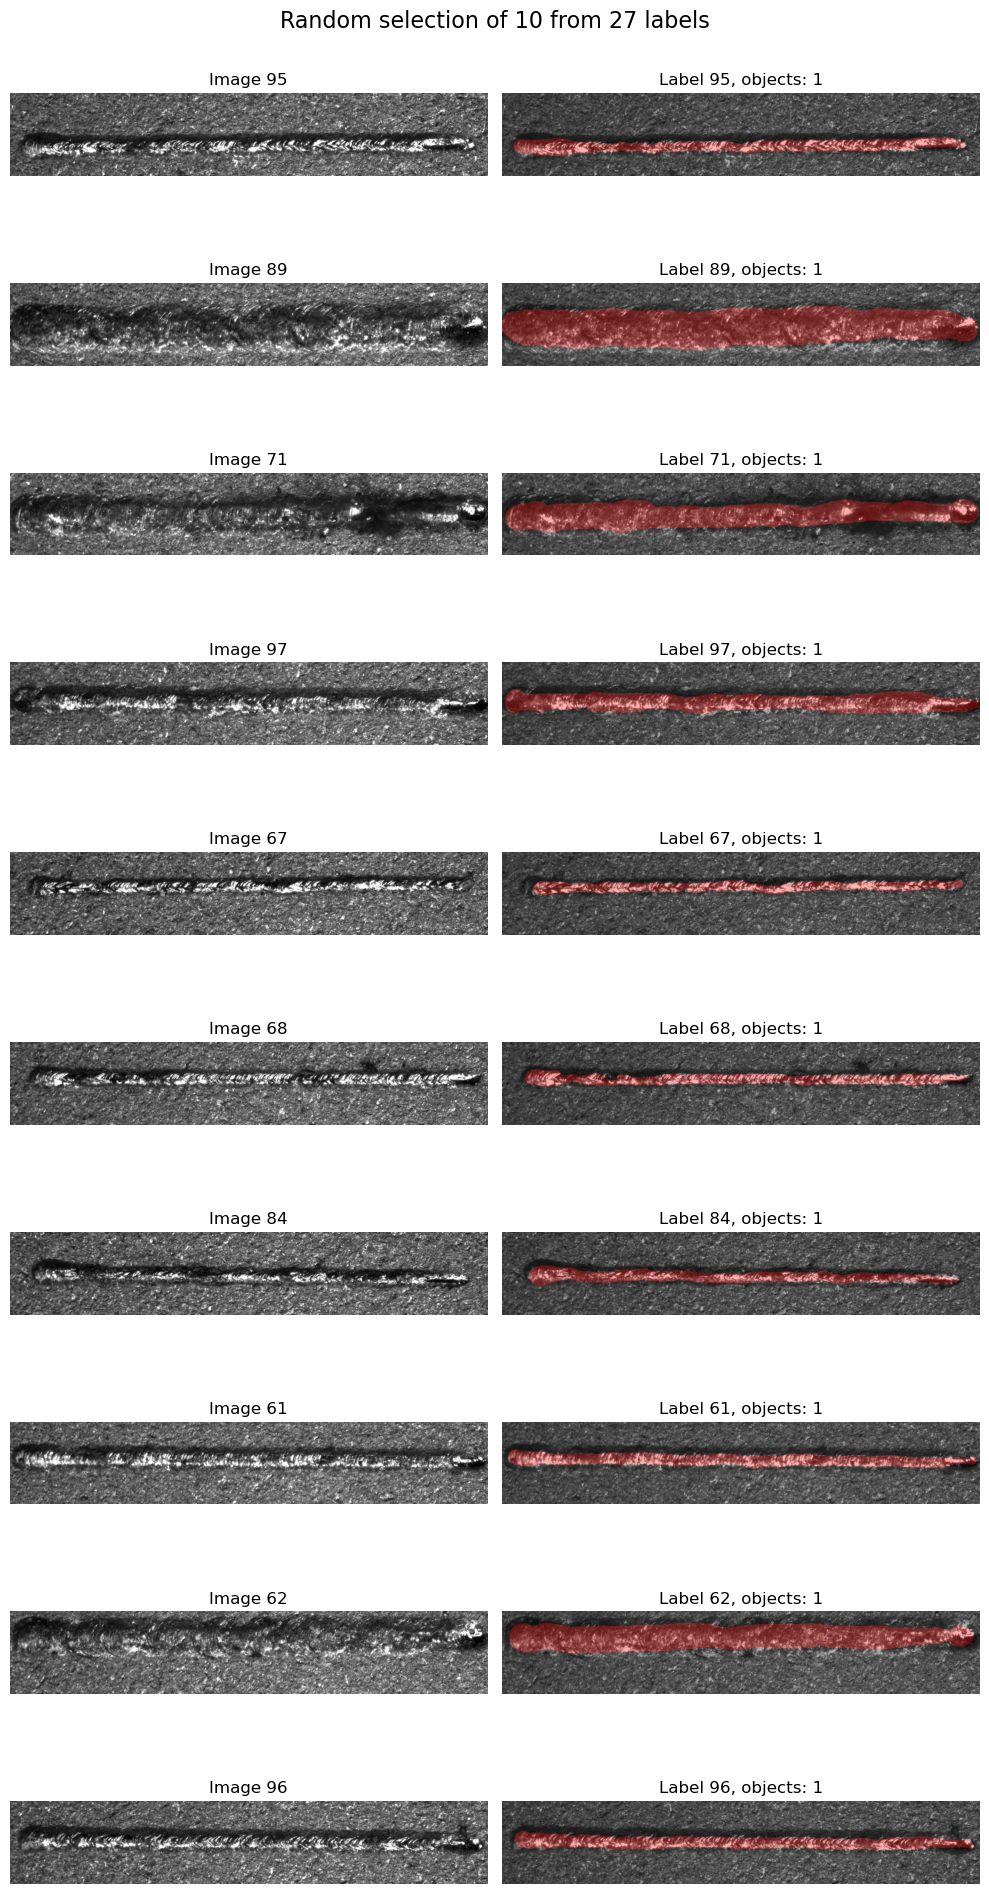

In [26]:
plot_random_labels(images_cropped, continious_tracks, tracks_id, num_labels=10, size=(10, 20))

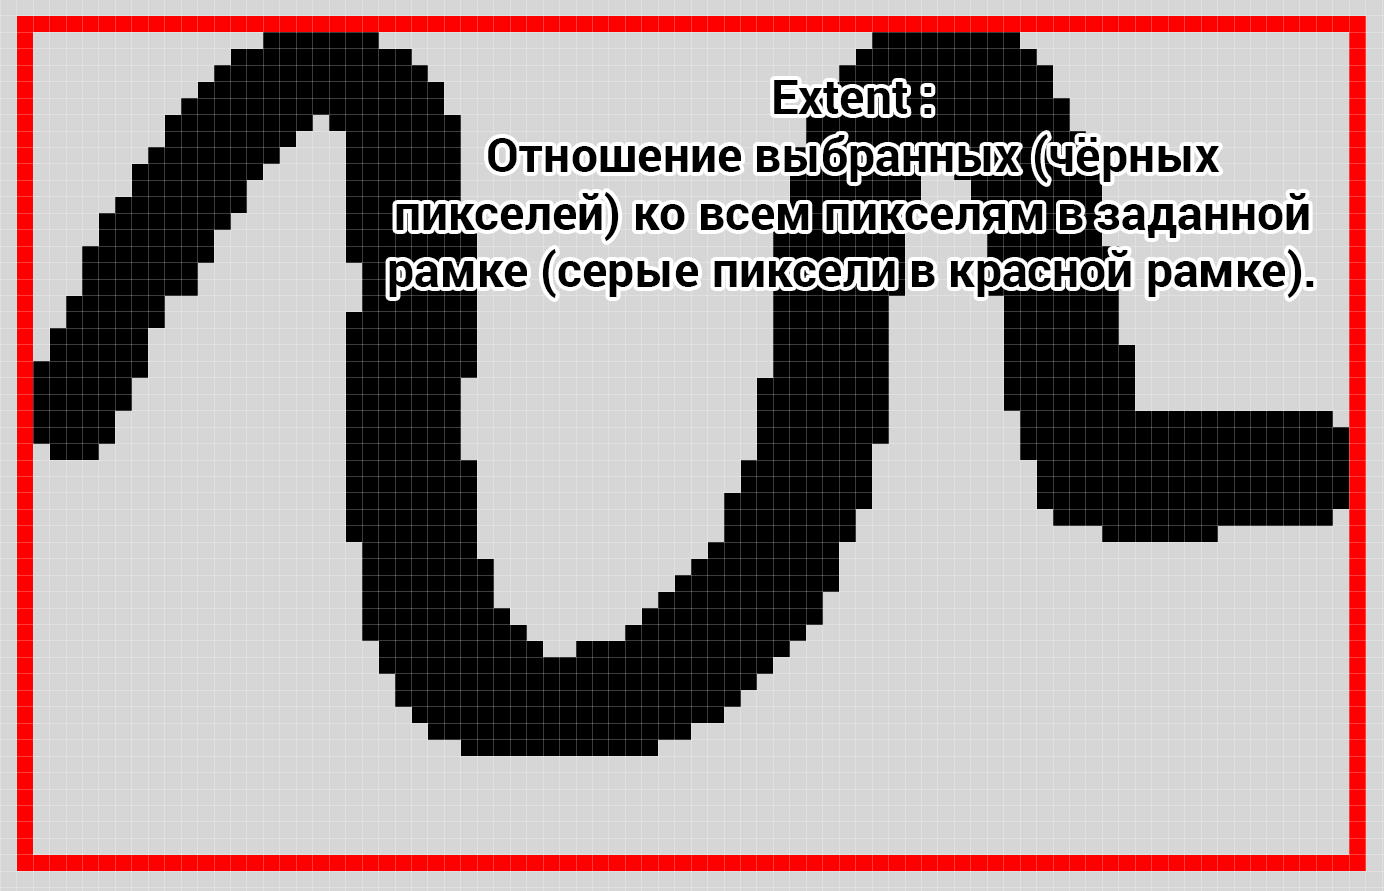

In [27]:
# Insert image to markdown

from IPython.display import Image
Image(filename="D:\Documents\Article. Benjamin\illustrations\extent.png", width=600, height=600)

In [32]:
propTabel = pd.DataFrame()
for track, index in zip(continious_tracks, tracks_id):
    prp_tbl = pd.DataFrame(measure.regionprops_table(track, properties=('bbox', 'area', 'bbox_area', 'extent')))
    prp_tbl['track_id'] = index
    propTabel = pd.concat([propTabel, prp_tbl], axis=0)
propTabel.set_index('track_id', inplace=True)
propTabel

,bbox-0,bbox-1,bbox-2,bbox-3,area,bbox_area,extent
track_id,,,,,,,
24,204,69,321,2562,48103,291681,0.164916
52,226,30,327,2581,130874,257651,0.507951
53,150,49,284,2571,199689,337948,0.590887
61,153,33,258,2574,149749,266805,0.561268
62,63,38,228,2557,319005,415635,0.767512
67,145,171,233,2499,111671,204864,0.545098
68,146,127,242,2532,120629,230880,0.522475
69,144,123,230,2544,139469,208206,0.669861
70,153,6,302,2559,170933,380397,0.449354


In [33]:
def pixel2mm(df, column_names):
    # Calculate the pixel size in mm
    koef = 10 / 2500
    for name in column_names:
        df[name] = df[name] * koef

In [34]:
def pixel2mm2(df, column_names):
    # Calculate the pixel size in mm
    koef = 10 / 2500
    for name in column_names:
        df[name] = df[name] * koef * koef

In [35]:
propTabel.columns

Index(['bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'area', 'bbox_area', 'extent'], dtype='object')

In [36]:
pixel2mm(propTabel, ['bbox-0', 'bbox-1', 'bbox-2', 'bbox-3'])
pixel2mm2(propTabel, ['area', 'bbox_area'])

In [37]:
propTabel

,bbox-0,bbox-1,bbox-2,bbox-3,area,bbox_area,extent
track_id,,,,,,,
24,0.816,0.276,1.284,10.248,0.769648,4.666896,0.164916
52,0.904,0.120,1.308,10.324,2.093984,4.122416,0.507951
53,0.600,0.196,1.136,10.284,3.195024,5.407168,0.590887
61,0.612,0.132,1.032,10.296,2.395984,4.268880,0.561268
62,0.252,0.152,0.912,10.228,5.104080,6.650160,0.767512
67,0.580,0.684,0.932,9.996,1.786736,3.277824,0.545098
68,0.584,0.508,0.968,10.128,1.930064,3.694080,0.522475
69,0.576,0.492,0.920,10.176,2.231504,3.331296,0.669861
70,0.612,0.024,1.208,10.236,2.734928,6.086352,0.449354


In [41]:
propTabelExport = propTabel.copy()
# Drop the bbox column
propTabelExport.drop(columns=['bbox-0', 'bbox-1', 'bbox-2', 'bbox-3'], inplace=True)
# Rename the columns
propTabelExport.rename(columns={'area': 'area_mm2', 'bbox_area': 'bbox_area_mm2'}, inplace=True)
# Export to csv
propTabelExport.to_csv('propTabel.csv')

In [42]:
# Range and increments for power and speed
power_start = 40
power_stop = 400
speed_start = 2000
speed_stop = 200

# Sequences of power and speed values. So there is 11 values for power and 9 for speed
power_values = np.linspace(power_start, power_stop, 11)
speed_values = np.linspace(speed_start, speed_stop, 9)

# Meshgrid for power and speed
power_grid, speed_grid = np.meshgrid(power_values, speed_values)

flux_density_lineral = power_grid/speed_grid

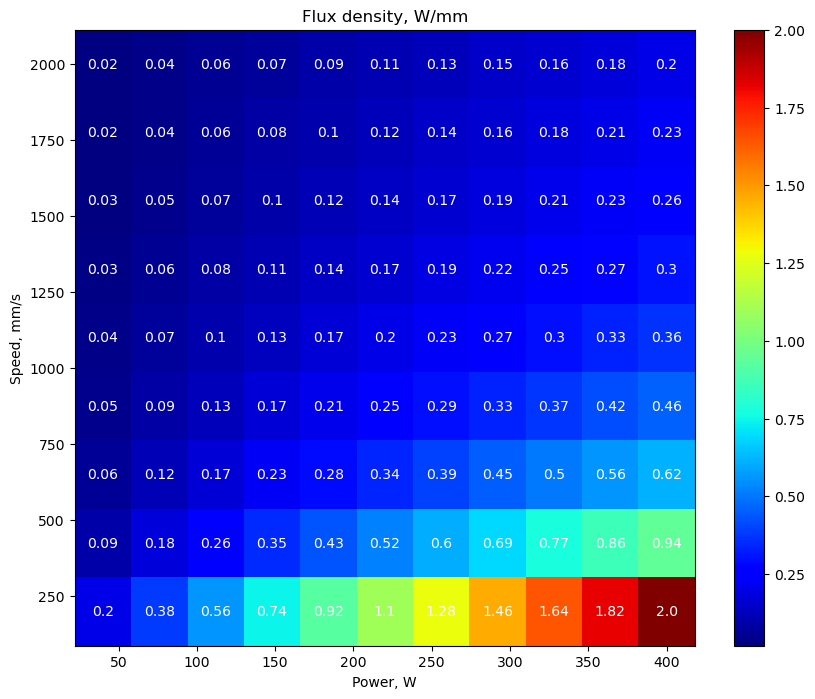

In [49]:
# Pcolormesh plot
plt.figure(figsize=(10, 8))
plt.pcolormesh(power_grid, speed_grid, flux_density_lineral, cmap='jet')

# Colorbar
plt.colorbar()

# X and Y labels
plt.xlabel('Power, W')
plt.ylabel('Speed, mm/s')

# Add flux density values to the each cell
for i in range(flux_density_lineral.shape[0]):
    for j in range(flux_density_lineral.shape[1]):
        plt.text(power_grid[i, j], speed_grid[i, j], round(flux_density_lineral[i, j], 2), ha='center', va='center', color='w')

# Title
plt.title('Flux density, W/mm')
plt.savefig('flux_density.png', dpi=600)
# Show plot
plt.show()

In [44]:
# Empty 2D array with the desired shape
num_rows = len(power_values)
num_cols = len(speed_values)
print(f"Array shape: {num_rows} x {num_cols}")
tracks_tech_params = np.zeros((num_rows, num_cols), dtype=[('power', int), ('speed', int)])

# Fill the array with (power, speed) tuples
for i, power_value in enumerate(power_values):
    for j, speed_value in enumerate(speed_values):
        tracks_tech_params[i, j] = (power_value, speed_value)

# Print the resulting array
print(tracks_tech_params)
tracks_tech_params_raveled = tracks_tech_params.ravel()

Array shape: 11 x 9
[[( 40, 2000) ( 40, 1775) ( 40, 1550) ( 40, 1325) ( 40, 1100) ( 40,  875)
  ( 40,  650) ( 40,  425) ( 40,  200)]
 [( 76, 2000) ( 76, 1775) ( 76, 1550) ( 76, 1325) ( 76, 1100) ( 76,  875)
  ( 76,  650) ( 76,  425) ( 76,  200)]
 [(112, 2000) (112, 1775) (112, 1550) (112, 1325) (112, 1100) (112,  875)
  (112,  650) (112,  425) (112,  200)]
 [(148, 2000) (148, 1775) (148, 1550) (148, 1325) (148, 1100) (148,  875)
  (148,  650) (148,  425) (148,  200)]
 [(184, 2000) (184, 1775) (184, 1550) (184, 1325) (184, 1100) (184,  875)
  (184,  650) (184,  425) (184,  200)]
 [(220, 2000) (220, 1775) (220, 1550) (220, 1325) (220, 1100) (220,  875)
  (220,  650) (220,  425) (220,  200)]
 [(256, 2000) (256, 1775) (256, 1550) (256, 1325) (256, 1100) (256,  875)
  (256,  650) (256,  425) (256,  200)]
 [(292, 2000) (292, 1775) (292, 1550) (292, 1325) (292, 1100) (292,  875)
  (292,  650) (292,  425) (292,  200)]
 [(328, 2000) (328, 1775) (328, 1550) (328, 1325) (328, 1100) (328,  875)
  

In [45]:
# Assign the power and speed values to the tracks. Use track_id as index to assign the values
propTabel['power'] = tracks_tech_params_raveled[propTabel.index]['power']
propTabel['speed'] = tracks_tech_params_raveled[propTabel.index]['speed']
propTabel['flux_density_lineral'] = propTabel['power'] / propTabel['speed']
propTabel

,bbox-0,bbox-1,bbox-2,bbox-3,area,bbox_area,extent,power,speed,flux_density_lineral
track_id,,,,,,,,,,
24,0.816,0.276,1.284,10.248,0.769648,4.666896,0.164916,112,650,0.172308
52,0.904,0.120,1.308,10.324,2.093984,4.122416,0.507951,220,425,0.517647
53,0.600,0.196,1.136,10.284,3.195024,5.407168,0.590887,220,200,1.100000
61,0.612,0.132,1.032,10.296,2.395984,4.268880,0.561268,256,425,0.602353
62,0.252,0.152,0.912,10.228,5.104080,6.650160,0.767512,256,200,1.280000
67,0.580,0.684,0.932,9.996,1.786736,3.277824,0.545098,292,1100,0.265455
68,0.584,0.508,0.968,10.128,1.930064,3.694080,0.522475,292,875,0.333714
69,0.576,0.492,0.920,10.176,2.231504,3.331296,0.669861,292,650,0.449231
70,0.612,0.024,1.208,10.236,2.734928,6.086352,0.449354,292,425,0.687059


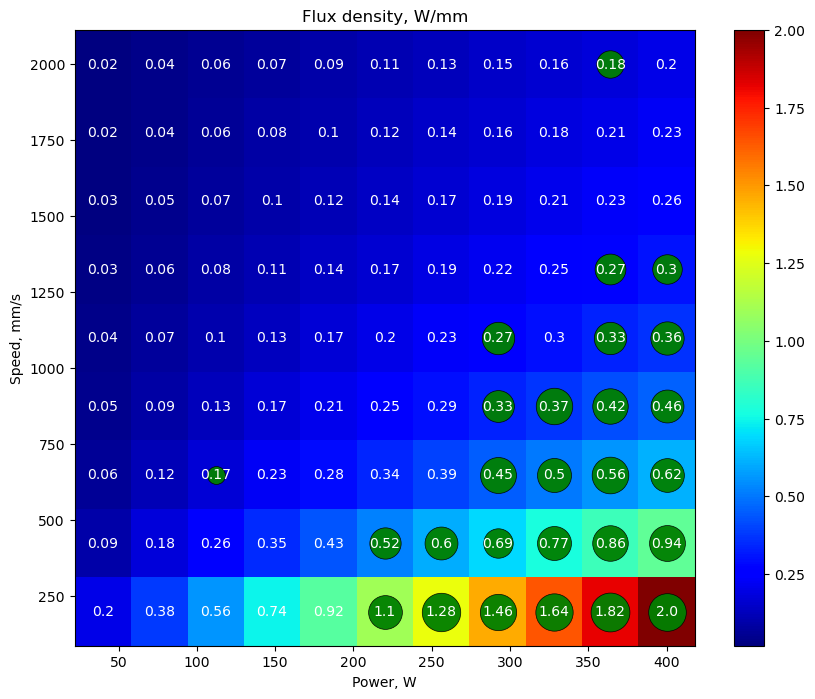

In [50]:
# Put on top of the power_grid and speed_grid pcolormesh plot contious tracks values.
# So that we can see new tracks on the plot
plt.figure(figsize=(10, 8))
plt.pcolormesh(power_grid, speed_grid, flux_density_lineral, cmap='jet')
plt.colorbar()
plt.xlabel('Power, W')
plt.ylabel('Speed, mm/s')
plt.title('Flux density, W/mm')

# Add flux density values to the each cell
for i in range(flux_density_lineral.shape[0]):
    for j in range(flux_density_lineral.shape[1]):
        plt.text(power_grid[i, j],\
                 speed_grid[i, j], round(flux_density_lineral[i, j], 2), ha='center', va='center', color='w')

# Plot the contious tracks
for track, index in zip(continious_tracks, tracks_id):
    # Get the power and speed values for the current track
    power = propTabel.loc[index, 'power']
    speed = propTabel.loc[index, 'speed']
    extent = propTabel.loc[index, 'extent']
    # Scatter plot the power and speed values
    plt.scatter(power, speed, c='g', s=extent*1000, alpha=0.95, edgecolors='k', linewidths=0.5)
plt.savefig('flux_density_with_tracks.png', dpi=600)
# Show plot
plt.show()